1.İki normal dağılıma sahip rassal sayı üretin. Bu rassal sayılardan birisinden 1000 tane 10.000 tane elde edelim. Bu iki rassal sayının da olasılık yoğunluk grafiğini çizelim. Sizce Merkezi Limit Teoremi bu olayda geçerli midir?

2.İki madeni paramızın olduğunu varsayalım. Bunlardan bir tanesi adil (yani, yeteri kadar deneme yapıldığında yazı veya tura 1/2 olasılığına yaklaşmakta) diğeri ile ise 3/4 olasılığında tura elde edilmektedir.Herhangi biri seçilip, n kere deneme yapıldığında,Sn tura sayısı olursa, Büyük Sayılar Yasası uzun vadede gelecek tura sayısını tahmin etmemize izin verir mi? Çok sayıda deneme yapıldığında, hangi paranın seçildiğini bilebilir miyiz? Kaç deneme bizi %95 oranında emin kılar?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1.İki normal dağılıma sahip rassal sayı üretin. Bu rassal sayılardan birisinden 1000 tane 10.000 tane elde edelim. Bu iki rassal sayının da olasılık yoğunluk grafiğini çizelim. Sizce Merkezi Limit Teoremi bu olayda geçerli midir?

In [2]:
birinci_rassal_sayi = np.random.normal(10, 0.2, 1000)
ikinci_rassal_sayi = np.random.normal(10, 0.2, 10000)

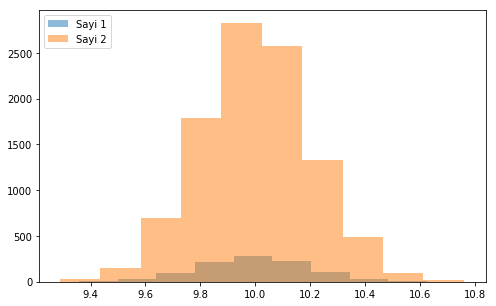

In [3]:
plt.figure(figsize=(8,5))

plt.hist(birinci_rassal_sayi, alpha=0.5, label='Sayi 1') 
plt.hist(ikinci_rassal_sayi, alpha=0.5, label='Sayi 2') 
plt.legend(loc='upper left') 
plt.show()

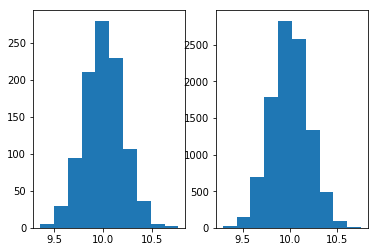

In [4]:
plt.subplot(1,2,1)
plt.hist(birinci_rassal_sayi)
plt.subplot(1,2,2)
plt.hist(ikinci_rassal_sayi)
plt.show()

Merkezi Limit teoremi gecerlidir ancak gozlem sayisi azaldikca etkisi azalmaktadir. 

2.İki madeni paramızın olduğunu varsayalım. Bunlardan bir tanesi adil (yani, yeteri kadar deneme yapıldığında yazı veya tura 1/2 olasılığına yaklaşmakta) diğeri ile ise 3/4 olasılığında tura elde edilmektedir.Herhangi biri seçilip, n kere deneme yapıldığında,Sn tura sayısı olursa, Büyük Sayılar Yasası uzun vadede gelecek tura sayısını tahmin etmemize izin verir mi? Çok sayıda deneme yapıldığında, hangi paranın seçildiğini bilebilir miyiz? Kaç deneme bizi %95 oranında emin kılar?

Kaç deneme yapmak istiyorsunuz:5


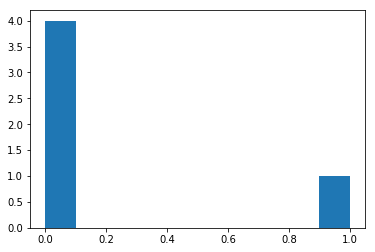

Yapılan atış sayısı:  5
Bir sonraki atış için hesaplanan tura gelme ihtimali:  0.2
Bir sonraki atış için hesaplanan yazı gelme ihtimali:  0.8


In [5]:
# 1. Yontem 

# programda deneme sayısı arttırıldığında yazı veya tura gelme olasılığının %50'ye yaklaştığı görülür. 

a = int(input('Kaç deneme yapmak istiyorsunuz:'))
atis = []
for i in range(1,a+1):
    atis.append(np.random.randint(0,2))
    
plt.hist(atis)
plt.show()
yazi = 0
tura = 0
for i in range(len(atis)):
    if atis[i] == 1:
        tura += 1
    else:
        yazi += 1
tura_iht = tura / len(atis)
yazi_iht = yazi / len(atis)
print('Yapılan atış sayısı: ', len(atis))
print('Bir sonraki atış için hesaplanan tura gelme ihtimali: ', tura_iht)
print('Bir sonraki atış için hesaplanan yazı gelme ihtimali: ', yazi_iht)

In [37]:
# 2. Yontem 
#1 deneme yapacağım 4 defa 0.5 olasılıkla atış yapacağım. Sonuc(0 ile 4 araliginda cikacak) 
#ve sonucta cikan sayi kadar basarili olunmus oluyor.


np.random.binomial(4, 0.75, 1)

array([4])

In [31]:
#4 para atisinda 2 TURA bulmamizin olasiligina bakalim: 

atislar = np.random.binomial(4, 0.75, 10000)

In [39]:
#Bu 10000 defa denemede 2107 defa 4 atışın 2 sinde TURA geldi,demek

np.sum(atislar==2)/10000


0.2107

In [48]:
# 4 para atisinda en az bir TURA gelme olasiligi 

hic_tura_gelmemesi_olasiligi = np.sum(atislar == 0) / 10000
hic_tura_gelmemesi_olasiligi

0.005

In [49]:
en_az_bir_tura_gelmesi = 1 - hic_tura_gelmemesi_olasiligi
en_az_bir_tura_gelmesi

0.995

In [52]:
(np.sum(atislar == 1) + np.sum(atislar == 2) + np.sum(atislar == 3) + np.sum(atislar == 4))/ 10000

0.995

In [57]:
birden_fazla_tura = 1 -(hic_tura_gelmemesi_olasiligi + np.sum(atislar == 1)/10000)
birden_fazla_tura

0.9517

Atis arttikca dogruluk artmaktadir. 